# Importing Libraries



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing the training set

In [94]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

# feature Scaling

In [95]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)

# creating a datastructure with 20 time steps and t+1 outputs

In [96]:
x_train = []
y_train = []
for i in range(20,1258):
    x_train.append(training_set[i-20:i,0])
    y_train.append(training_set[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshaping

In [101]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [102]:
x_train.ndim

3

In [103]:
print(dataset_train)

            Date    Open    High     Low   Close      Volume
0       1/3/2012  325.25  332.83  324.97  663.59   7,380,500
1       1/4/2012  331.27  333.87  329.08  666.45   5,749,400
2       1/5/2012  329.83  330.75  326.89  657.21   6,590,300
3       1/6/2012  328.34  328.77  323.68  648.24   5,405,900
4       1/9/2012  322.04  322.29  309.46  620.76  11,688,800
5      1/10/2012  313.70  315.72  307.30  621.43   8,824,000
6      1/11/2012  310.59  313.52  309.40  624.25   4,817,800
7      1/12/2012  314.43  315.26  312.08  627.92   3,764,400
8      1/13/2012  311.96  312.30  309.37  623.28   4,631,800
9      1/17/2012  314.81  314.81  311.67  626.86   3,832,800
10     1/18/2012  312.14  315.82  309.90  631.18   5,544,000
11     1/19/2012  319.30  319.30  314.55  637.82  12,657,800
12     1/20/2012  294.16  294.40  289.76  584.39  21,231,800
13     1/23/2012  291.91  293.23  290.49  583.92   6,851,300
14     1/24/2012  292.07  292.74  287.92  579.34   6,134,400
15     1/25/2012  287.68

# Building the RNN

In [104]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# Intialising the model



In [105]:
regressor = Sequential()

# Adding the input layer and LSTM layer



In [106]:
regressor.add(LSTM(units = 3,  input_shape = (None,1)))# units = 4 for rnn is good

#  Adding Output layer



In [107]:
regressor.add(Dense(units = 1)) # units is the shape of timestamp

# Compiling the RNN



In [108]:
regressor.compile(optimizer = 'rmsprop', loss = 'mean_squared_error')

# Fitting RNN to the Training set 



In [109]:
regressor.fit(x_train,y_train,batch_size = 32 ,epochs = 100)

Epoch 1/100
1257/1257 [==============================] - 1s 643us/step - loss: 0.2650
Epoch 2/100
1257/1257 [==============================] - 0s 66us/step - loss: 0.2085
Epoch 3/100
1257/1257 [==============================] - 0s 67us/step - loss: 0.1594
Epoch 4/100
1257/1257 [==============================] - 0s 67us/step - loss: 0.1170
Epoch 5/100
1257/1257 [==============================] - 0s 60us/step - loss: 0.0844
Epoch 6/100
1257/1257 [==============================] - 0s 65us/step - loss: 0.0625
Epoch 7/100
1257/1257 [==============================] - 0s 67us/step - loss: 0.0519
Epoch 8/100
1257/1257 [==============================] - 0s 63us/step - loss: 0.0464
Epoch 9/100
1257/1257 [==============================] - 0s 69us/step - loss: 0.0412
Epoch 10/100
1257/1257 [==============================] - 0s 64us/step - loss: 0.0359
Epoch 11/100
1257/1257 [==============================] - 0s 65us/step - loss: 0.0303
Epoch 12/100
1257/1257 [==============================] - 0s 6

# Getting the Real stock price for february 1st 2012 - January 31st 2017



In [110]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
test_set = dataset_test.iloc[:,1:2].values
real_price = np.concatenate((training_set[0:1258],test_set),axis = 0)

In [111]:
real_price

array([[8.58136766e-02],
       [9.70124265e-02],
       [9.43336558e-02],
       ...,
       [8.34710000e+02],
       [8.14660000e+02],
       [7.96860000e+02]])

# Getting the predicted stock price of 2017



In [112]:
scaled_real_stock_price = sc.fit_transform(real_price)
inputs = []
for i in range(1258,1278):
    inputs.append(scaled_real_stock_price[i-20:i, 0])
inputs = np.array(inputs)
inputs = np.reshape(inputs, (inputs.shape[0], inputs.shape[1],1))
predicted_price = regressor.predict(inputs)
predicted_price =sc.inverse_transform(predicted_price)                

# Visualising the data

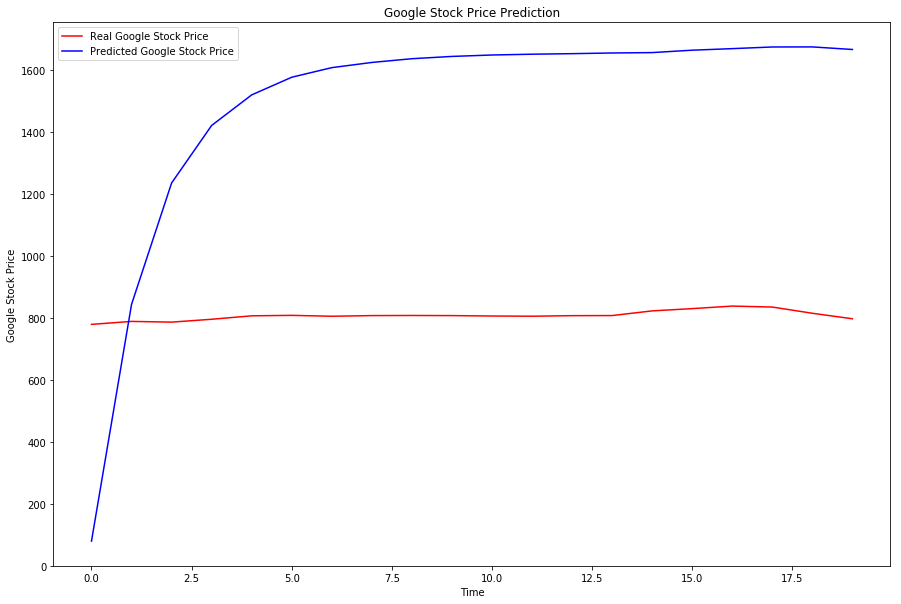

In [114]:
plt.rcParams['figure.figsize'] = (15,10)
plt.plot(real_price[1258:], color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()